# <center>CSIS 452 - Applied Machine Learning</center>
## Assignment 6 - due: 4/23/2019
In this assignment you will develop a Shallow Neural Network (SNN) for handwritten digit recognition using MNIST data set.

Enter your name as a comment in the cell below

In [1]:
#Gabe Austin

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

import keras
from keras import optimizers
from keras import losses
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K 
from keras import backend as K

Using TensorFlow backend.


The following function can be used to display a random sample of images along with targets and predicted class.

In [2]:
def display_a_random_sample_of_images(grid_size, images, targets, predictions=np.array([]), title="images"):
    """ 
    Displayes a random sample of images with the corresponding targets
    
    
    Argument:
        grid_size -- size of subplot will be grid_sizeXgrid_size.
        images -- an array of images 32x32  (num_images x 8 x 8)
        targets -- an array of class values (num_images x 1) containing class values 
             between 0 and 9  
        predictions -- an array of predicted class values (nume_images X 1) containig predicted
             class values between 0 and 9
    Returns:
        None
    """

    class_names = ['0','1','2','3','4','5','6','7','8','9']
    #reshape the images for display
    
    fig, axes1 = plt.subplots(grid_size,grid_size,figsize=(3,3))
    fig.suptitle(title, fontsize="x-small")
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=0.8)
    
    for j in range(grid_size):
        for k in range(grid_size):
            i = np.random.choice(range(len(images)))
            axes1[j][k].set_axis_off()
            if predictions.size > 0:
                axes1[j][k].set_title(class_names[targets[i]]+","+class_names[predictions[i]])
            else:
                axes1[j][k].set_title(class_names[targets[i]])
            axes1[j][k].title.set_fontsize(8)
            axes1[j][k].imshow(images[i, :,:], cmap = matplotlib.cm.binary, interpolation="nearest")

Let's first load the data set from keras datasets.  You will need to look at Keras datasets documentation, learn about the MNIST data set and develop the code below.

In [3]:
from keras.datasets import mnist
def load_digits():
    """
    Load and returns images and targets from the sklearn digits dataset.  
    
    Arguments: None
    
    #Returns: 
        images -- an array of digit images (num_imagesX8x8) 
               -- images are in normlaized form
        target_classes -- an array of class values (num_imagesX1) containing 
        class values between 0 and 9

    """    

    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    return X_train, y_train, X_test, y_test

Now, let's load the images and display a random sample of 9 images in a 3-by-3 grid along with their corresponding target class using the functions developed above.

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


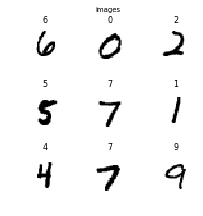

In [4]:
X_train, y_train, X_test, y_test = load_digits()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
np.random.seed(2)
display_a_random_sample_of_images(3, X_train, y_train, title="images")
plt.show()


## Expected output:
<img src="Figure1.png" width="20%" height="20%" align="left"> <br>


Next, we will reshape the train images from 60000 x 28 x 28 to 60000 x 784 and test images from 10000 x 28 x 28 to 10000 x 784. This way, each image will be represented with a vector of 784 pixel values. We will also reshape the targets to a rank-2 vector.

In [5]:
X_train_flat = X_train.reshape(X_train.shape[0], 784)
y_train_flat = y_train.reshape(y_train.shape[0], 1)
X_test_flat = X_test.reshape(X_test.shape[0], 784)
y_test_flat = y_test.reshape(y_test.shape[0], 1)

print(X_train_flat.shape, y_train_flat.shape, X_test_flat.shape, y_test_flat.shape)

(60000, 784) (60000, 1) (10000, 784) (10000, 1)


## Expected output:
(60000, 784) (60000, 1) (10000, 784) (10000, 1)

We will now develop and train a three-layer (nx-128(tanh)-64(tanh)-ny(softmax)) Shallow Neural Network and train it using the data we just extracted.

Let's OneHot encode the targets first

In [6]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
y_train_1hot = cat_encoder.fit_transform(y_train_flat)
y_test_1hot = cat_encoder.fit_transform(y_test_flat)
print(y_train_1hot.shape)
print(y_test_1hot.shape)

(60000, 10)
(10000, 10)


C:\Users\Gabe\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Gabe\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

## Expected output:
(60000, 10)
(10000, 10)

Now, let's build the model and train it.  Use validation_split of 0.1 to allow for a 10% validation set.  Keep in mind that this is a multi-class problem, so your loss should be <b>categorical_crossentropy</b> and for metrics use <b>accuracy</b>.

In [7]:
from tensorflow import set_random_seed

num_classes = 10
n_hidden1 = 128
n_hidden2 = 64
n_outputs = num_classes  

learning_rate = 0.01
num_epochs = 5
    
model = Sequential()

model.add(Dense(units = n_hidden1, activation='tanh', input_dim=784))
model.add(Dense(units = n_hidden2, activation='tanh'))
model.add(Dense(units = num_classes, activation='softmax'))

opt = keras.optimizers.SGD(lr=learning_rate)
model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['accuracy'])

history = model.fit(X_train_flat, y_train_1hot, epochs=num_epochs, validation_split=0.1, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 9s 158us/step - loss: 0.8147 - acc: 0.7621 - val_loss: 0.4992 - val_acc: 0.8558
Epoch 2/5
54000/54000 [==============================] - 7s 137us/step - loss: 0.5425 - acc: 0.8386 - val_loss: 0.4899 - val_acc: 0.8537
Epoch 3/5
54000/54000 [==============================] - 8s 139us/step - loss: 0.5125 - acc: 0.8442 - val_loss: 0.4173 - val_acc: 0.8762
Epoch 4/5
54000/54000 [==============================] - 8s 139us/step - loss: 0.4982 - acc: 0.8453 - val_loss: 0.4492 - val_acc: 0.8595
Epoch 5/5
54000/54000 [==============================] - 8s 141us/step - loss: 0.4760 - acc: 0.8500 - val_loss: 0.3856 - val_acc: 0.8863


Let's plot training curves and see how the model is doing on training and validation.

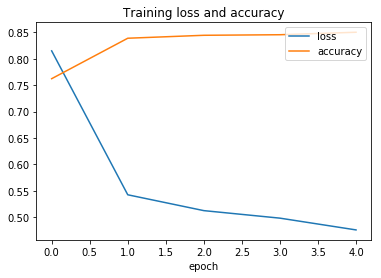

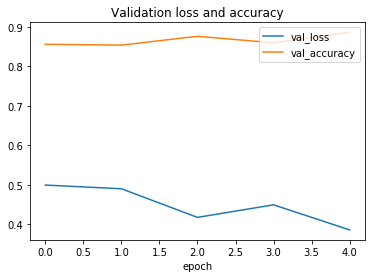

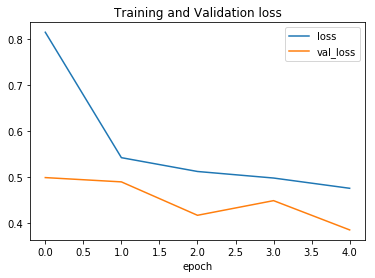

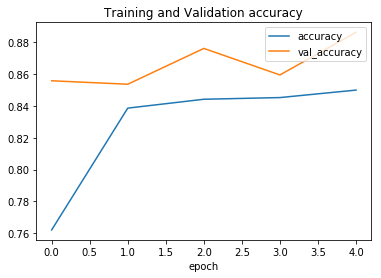

In [8]:
training_fig = plt.figure()
training_ax = training_fig.add_subplot(111)
training_ax.plot(history.history['loss'])
training_ax.plot(history.history['acc'])
training_ax.set_title('Training loss and accuracy')
training_ax.set_xlabel('epoch')
training_ax.legend(['loss', 'accuracy'], loc='upper right')

validation_fig = plt.figure()
validation_ax = validation_fig.add_subplot(111)
validation_ax.plot(history.history['val_loss'])
validation_ax.plot(history.history['val_acc'])
validation_ax.set_title('Validation loss and accuracy')
validation_ax.set_xlabel('epoch')
validation_ax.legend(['val_loss', 'val_accuracy'], loc='upper right')

tarin_val_loss_fig = plt.figure()
tarin_val_loss_ax = tarin_val_loss_fig.add_subplot(111)
tarin_val_loss_ax.plot(history.history['loss'])
tarin_val_loss_ax.plot(history.history['val_loss'])
tarin_val_loss_ax.set_title('Training and Validation loss')
tarin_val_loss_ax.set_xlabel('epoch')
tarin_val_loss_ax.legend(['loss', 'val_loss'], loc='upper right')

tarin_val_loss_fig = plt.figure()
tarin_val_loss_ax = tarin_val_loss_fig.add_subplot(111)
tarin_val_loss_ax.plot(history.history['acc'])
tarin_val_loss_ax.plot(history.history['val_acc'])
tarin_val_loss_ax.set_title('Training and Validation accuracy')
tarin_val_loss_ax.set_xlabel('epoch')
tarin_val_loss_ax.legend(['accuracy', 'val_accuracy'], loc='upper right')


plt.show()

## Expected output:
<p>Your plots should be similar to the ones below, but they won't be exact match</P>
<p><img src="Figure2.png" width="40%" height="40%" align="left"> <br></p>


Now let's evaluate the model on the training and test images.  First, we will need to get the h values.  Keep in mind that the we need to inverse transform the 1hot encoded labels to the original labels.

In [9]:
p_train_1hot = model.predict(X_train_flat)
h_train_1hot = np.array([elm for elm in p_train_1hot>0.5], dtype=int) #Convert probabilities to class labels)
h_train =  np.squeeze(cat_encoder.inverse_transform(h_train_1hot)) #Retrive original class labels)

p_train_1hot = model.predict(X_test_flat)
h_test_1hot = np.array([elm for elm in p_train_1hot>0.5], dtype=int) 
h_test =  np.squeeze(cat_encoder.inverse_transform(h_test_1hot)) 

Next, we will measure the model performance on the training set and test set using Confusion Matrix, Average Accuracy, Average Precision, Average Recall and Average F1-Score. 

In [10]:
cf_train = confusion_matrix(y_train, h_train)
ca_train = np.mean(accuracy_score(np.squeeze(y_train), np.squeeze(h_train)))
ps_train = np.mean(precision_score(y_train, h_train, average='weighted')) 
rs_train = np.mean(recall_score(y_train, h_train, average='weighted'))
f1_train = np.mean(f1_score(y_train, h_train, average='weighted'))
print("Training Performance")
print("Average Train Confusion Matrix:\n", cf_train)
print("Average Train Accuracy: {0:0.2%}".format(ca_train))
print("Average Train Precision {0:0.2%}".format(ps_train))
print("Average Train Recall: {0:0.2%}".format(rs_train))
print("Average Train F1: {0:0.2%}".format(f1_train))

cf_test = confusion_matrix(y_test, h_test)
ca_test = accuracy_score(np.squeeze(y_test), np.squeeze(h_test))
ps_test = precision_score(y_test, h_test, average='weighted')
rs_test = recall_score(y_test, h_test, average='weighted')
f1_test = f1_score(y_test, h_test, average='weighted')
print("Training Performance")
print("Average Test Confusion Matrix:\n", cf_test)
print("Average Test Accuracy: {0:0.2%}".format(ca_test))
print("Average Test Precision {0:0.2%}".format(ps_test))
print("Average Test Recall {0:0.2%}".format(rs_test))
print("Average Test F1: {0:0.2%}".format(f1_test))

Training Performance
Average Train Confusion Matrix:
 [[5732    1   15   14    5   67   52    8   20    9]
 [ 152 6400   23   13    3    7   15   11  108   10]
 [ 672   43 4584   74   60    5  115   95  274   36]
 [ 863   16   89 4535    1  267   18   53  226   63]
 [ 520   15   26    4 4480    6   64    3   34  690]
 [ 829   18   10  100   25 4122   74   28  157   58]
 [ 341   21   41    1   80   46 5343    1   44    0]
 [ 330   23   27    8   39   13    1 5525   18  281]
 [ 724   70   63  162   12  176   79   15 4471   79]
 [ 446   25   17   47  216   35    5  123  113 4922]]
Average Train Accuracy: 83.52%
Average Train Precision 86.43%
Average Train Recall: 83.52%
Average Train F1: 84.09%
Training Performance
Average Test Confusion Matrix:
 [[ 945    1    6    4    0    6   11    1    2    4]
 [  16 1095    1    3    0    1    2    0   16    1]
 [ 120   10  793    9    7    1   23   13   50    6]
 [ 135    1   16  758    0   43    3   10   40    4]
 [  84    1    1    1  747    1   

## Expected output:
<p> You performance should be close to the following, it won't be exact.</p>
<p><img src="Figure4.png" width="40%" height="40%" align="left"> <br></p>


Finally, let's examine a set of images and compare their predicted and actual labels.

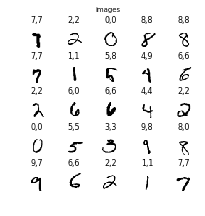

In [11]:
np.random.seed(5)
display_a_random_sample_of_images(5, X_test, y_test, title="images", predictions = h_test.astype(int))

## Expected output:
<p> You output should be close to the following, but it won't be exact.</p>
<p><img src="Figure5.png" width="20%" height="20%" align="left"> <br></p>